In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict
from tensorflow import keras
from keras import layers

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [4]:
ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18,
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
    'Y': 25, 'Z': 26
})

In [5]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(182,)

In [6]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32") / 255
imgs.shape

(182, 50, 50)

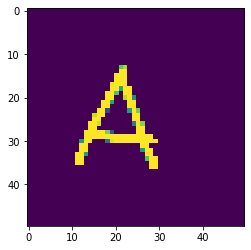

In [7]:
plt.figure()
plt.imshow(imgs[1])
plt.grid(False)
plt.show()

In [8]:
imgs = np.expand_dims(imgs, -1)

In [9]:
labels, imgs = shuffle

TypeError: cannot unpack non-iterable function object

In [10]:
labels, imgs = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [11]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [12]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [13]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

Epoch 1/20
9/9 [==============================] - 1s 52ms/step - loss: 3.2726 - accuracy: 0.0882 - val_loss: 3.2498 - val_accuracy: 0.1304
Epoch 2/20
9/9 [==============================] - 0s 31ms/step - loss: 2.7223 - accuracy: 0.4265 - val_loss: 3.0745 - val_accuracy: 0.1739
Epoch 3/20
9/9 [==============================] - 0s 27ms/step - loss: 1.7657 - accuracy: 0.6324 - val_loss: 2.5165 - val_accuracy: 0.4348
Epoch 4/20
9/9 [==============================] - 0s 28ms/step - loss: 0.7119 - accuracy: 0.8456 - val_loss: 2.1148 - val_accuracy: 0.5435
Epoch 5/20
9/9 [==============================] - 0s 27ms/step - loss: 0.3076 - accuracy: 0.9044 - val_loss: 2.5489 - val_accuracy: 0.6522
Epoch 6/20
9/9 [==============================] - 0s 27ms/step - loss: 0.1408 - accuracy: 0.9559 - val_loss: 3.1760 - val_accuracy: 0.6087
Epoch 7/20
9/9 [==============================] - 0s 26ms/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 3.4448 - val_accuracy: 0.5652


In [14]:
labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

2/2 [==============================] - 0s 7ms/step


In [15]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

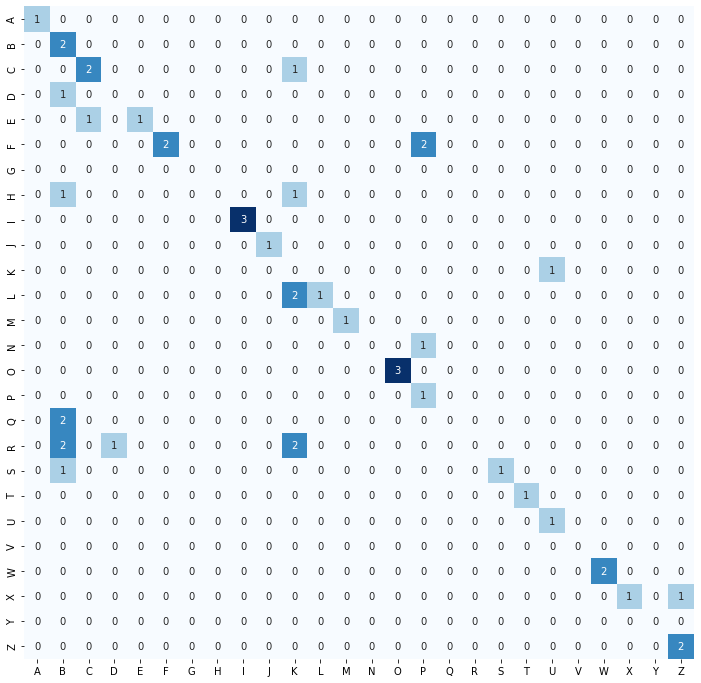

In [18]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [17]:
model.save('../letter.model')

INFO:tensorflow:Assets written to: ../letter.model\assets


INFO:tensorflow:Assets written to: ../letter.model\assets
